In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.core.display import Image, display
import helpingTools

# helpingTools = reload(helpingTools)


In [2]:
labelList = ["damping_sweep", "theta_sweep", "eta_sweep", "gamma_sweep"]
parameterList = ["ts", "damping", "gamma", "theta", "eta"]

KEY = ["00", "01", "10", "11"]
colorMapping = {"00": "blue", "01": "orange", "10": "green", "11": "red"}

In [3]:
def showGIF(item):     
    filename = f"parameter/animation_ts_{item['ts']}_damping_{item['damping']}" + \
               f"_parameter_{item['gamma']},{item['theta']},{item['eta']}_times.gif"
    print(filename)
    print(f"time stretch = {item['ts']}, damping = {item['damping']}, " + \
               f"gamma = {item['gamma']}, theta = {item['theta']}, eta = {item['eta']}")
    for _key, _item in item["statistics"].items():
        print(f"{_key} ({colorMapping[_key]}): {_item}")
    display(Image(url=filename))

def showBatchGIF(_label, parameterName):
    with open("parameter/result.json", "r") as rf:
        data = json.load(rf)
        filteredData = [x for x in data if x["label"] == _label]

        gamma_list = []
        statisticsDict = {
            "00": {"goodRatio": [], "mean_x": [], "var_x": []},
            "01": {"goodRatio": [], "mean_x": [], "var_x": []},
            "10": {"goodRatio": [], "mean_x": [], "var_x": []},
            "11": {"goodRatio": [], "mean_x": [], "var_x": []}
        }
    
        for item in filteredData:
            showGIF(item)

In [4]:
# deleteLabel

# _label = "gamma_sweep"
with open("parameter/result.json", "r") as rf:
    data = json.load(rf)
    print(data)
#     for x in data:
#         x["gamma"] = x["sim_parameters"][0]
#         x["theta"] = x["sim_parameters"][1]
#         x["eta"] = x["sim_parameters"][2]
#         x.pop('sim_parameters', None)
#         print(x)
#     data = [x for x in data if x["label"] != _label]
#     with open("parameter/result.json", "w") as wf:
#         json.dump(data, wf)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
def analysisFunction(label, parameterName):
    with open("parameter/result.json", "r") as rf:
        data = json.load(rf)
        filteredData = [x for x in data if x["label"] == _label]

        statisticObject = {}

        gamma_list = []
        statisticsDict = {
            "00": {"goodRatio": [], "mean_x": [], "var_x": []},
            "01": {"goodRatio": [], "mean_x": [], "var_x": []},
            "10": {"goodRatio": [], "mean_x": [], "var_x": []},
            "11": {"goodRatio": [], "mean_x": [], "var_x": []}
        }

        for _item in filteredData:
            _item_statistics = _item["statistics"]
            gamma_list.append(_item[parameterName])

            for _key in KEY:
                statisticsDict[_key]["goodRatio"].append(_item_statistics[_key]["goodRatio"])
                statisticsDict[_key]["mean_x"].append(_item_statistics[_key]["mean_x"])
                statisticsDict[_key]["var_x"].append(_item_statistics[_key]["var_x"])

        fig, ax = plt.subplots(1, 3, figsize=(18,4))
        fixedParameterList = [f"{x}: {filteredData[0][x]}" for x in parameterList if parameterName != x]
        print(fixedParameterList)
        
        
        for key in KEY:
    #         fig.tight_layout()
            #create subplots
            ax[0].plot(gamma_list, statisticsDict[key]["goodRatio"], label=f"{key}", color = colorMapping[key])
            ax[0].title.set_text(f'goodRatio vs {_label}')
            ax[0].legend()

            ax[1].plot(gamma_list, statisticsDict[key]["mean_x"], label=f"{key}", color = colorMapping[key])
            ax[1].title.set_text(f'mean_x vs {_label}')
            ax[1].legend()

            ax[2].plot(gamma_list, statisticsDict[key]["var_x"], label=f"{key}", color = colorMapping[key])
            ax[2].set_ylim(0, 3)
            ax[2].title.set_text(f'var_x vs {_label}')
            ax[2].legend()
        plt.show()

In [6]:
import json
import numpy as np
import importlib 
helpingTools = importlib.reload(helpingTools)

def processTimeDependentStatisticArray(statisticsData, category):
    category_index = int(category, 2) # change 00, 01, 10, 11 into 0, 1, 2, 3
    return {
        "x_mean": statisticsData[:, category_index, 0],
        "x_var": statisticsData[:, category_index, 1],
        "y_mean": statisticsData[:, category_index, 2],
        "y_var": statisticsData[:, category_index, 3],
    }

def showSweepTimeDependentStatistics(_label, parameterName):
    with open("parameter/result.json", "r") as rf:
        data = json.load(rf)
        filteredData = [x for x in data if x["label"] == _label]
        
    for dataSet in filteredData:
        # time steps
        step_indices = dataSet["time_dependent_statistic"]["step_indices"]

        # statistics is an array of 4 array. 
        # the first level is the steps.
        # the second level is the categories of the positions (00, 01, 10, 11)
        # the third level is [x_mean, x_var, y_mean, y_var]
        statistics =  np.array(dataSet["time_dependent_statistic"]["values"])
        
        
        # parameterDict
        parameterDict = {
            "ts": dataSet["ts"],
            "damping": dataSet["damping"],
            "gamma": dataSet["gamma"],
            "theta": dataSet["theta"],
            "eta": dataSet["eta"],
        }
        
        filename = f"parameter/animation_ts_{parameterDict['ts']}_damping_{parameterDict['damping']}" + \
               f"_parameter_{parameterDict['gamma']},{parameterDict['theta']},{parameterDict['eta']}_times.gif"
        print(filename)

        
        
        helpingTools.plotStatisticsChangingWithTime(step_indices, statistics, parameterDict)
        display(Image(url=filename))
#     print(filteredData)


# Time Stretch Sweep

In [33]:
_label="time_stretch_sweep"
parameterName = "ts"
# analysisFunction(_label, "parameterName")


parameter/animation_ts_2.0_damping_1_parameter_4,80,10_times.gif
{'ts': 2.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


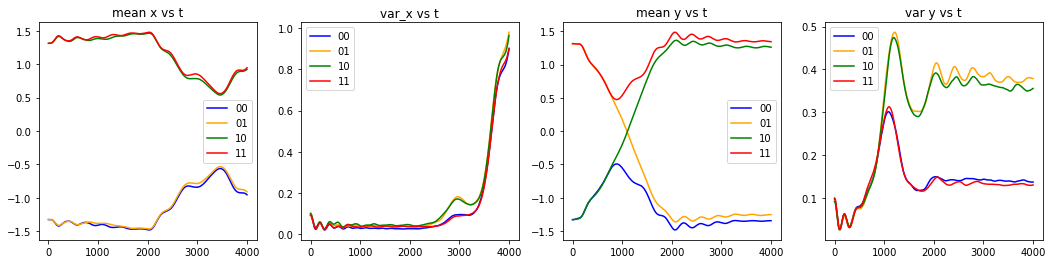

parameter/animation_ts_4.0_damping_1_parameter_4,80,10_times.gif
{'ts': 4.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


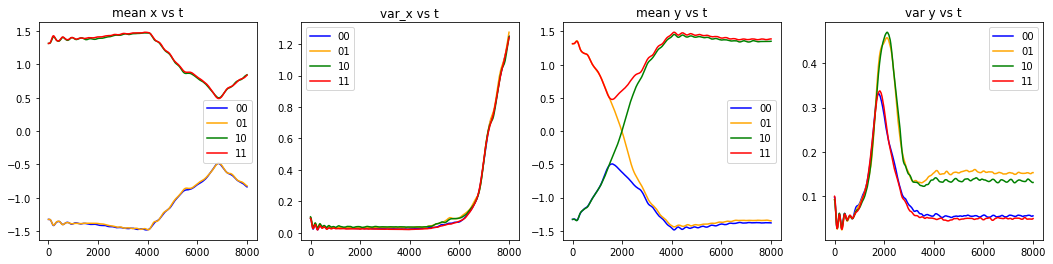

parameter/animation_ts_6.0_damping_1_parameter_4,80,10_times.gif
{'ts': 6.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


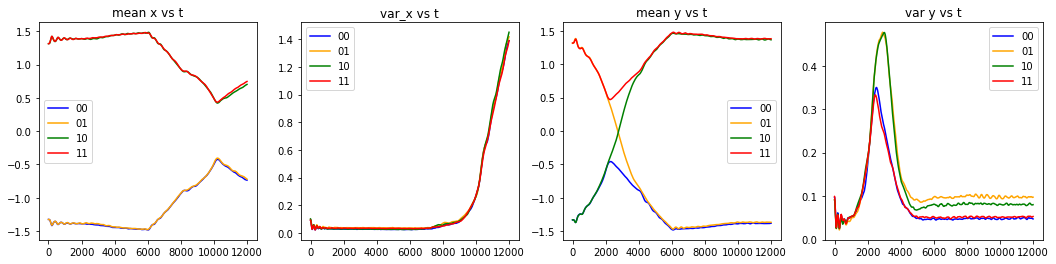

parameter/animation_ts_8.0_damping_1_parameter_4,80,10_times.gif
{'ts': 8.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


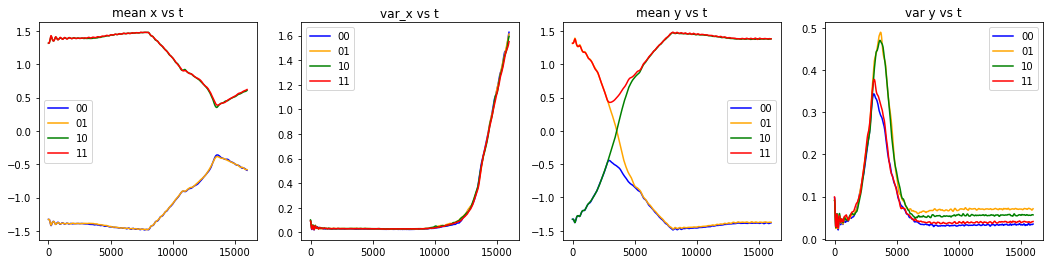

parameter/animation_ts_10.0_damping_1_parameter_4,80,10_times.gif
{'ts': 10.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


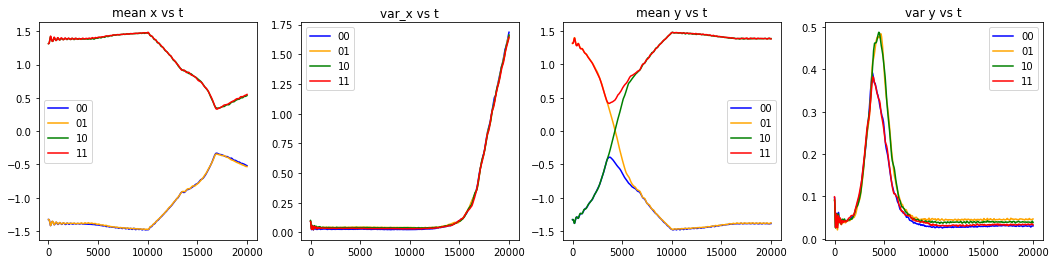

parameter/animation_ts_12.0_damping_1_parameter_4,80,10_times.gif
{'ts': 12.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


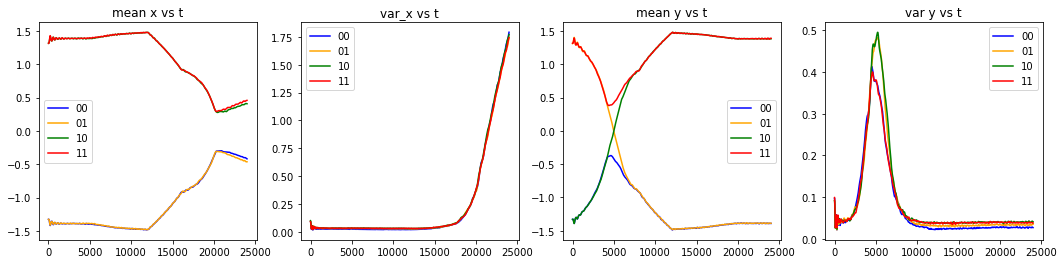

parameter/animation_ts_14.0_damping_1_parameter_4,80,10_times.gif
{'ts': 14.0, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10}


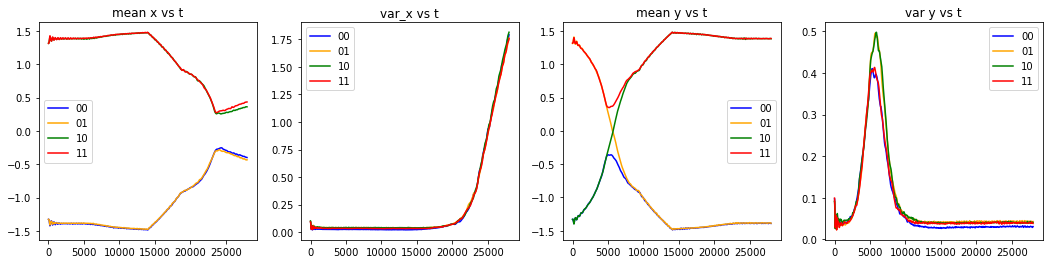

In [35]:
showSweepTimeDependentStatistics(_label, parameterName)

# Damping Sweep

parameter/animation_ts_1_damping_1.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 1.0, 'gamma': 4, 'theta': 80, 'eta': 10}


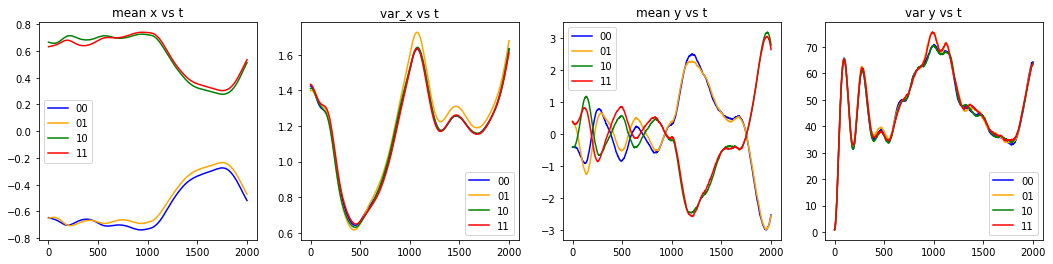

parameter/animation_ts_1_damping_2.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 2.0, 'gamma': 4, 'theta': 80, 'eta': 10}


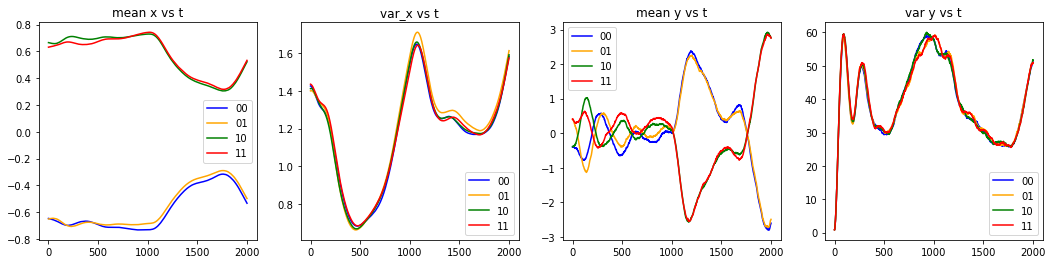

parameter/animation_ts_1_damping_3.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 3.0, 'gamma': 4, 'theta': 80, 'eta': 10}


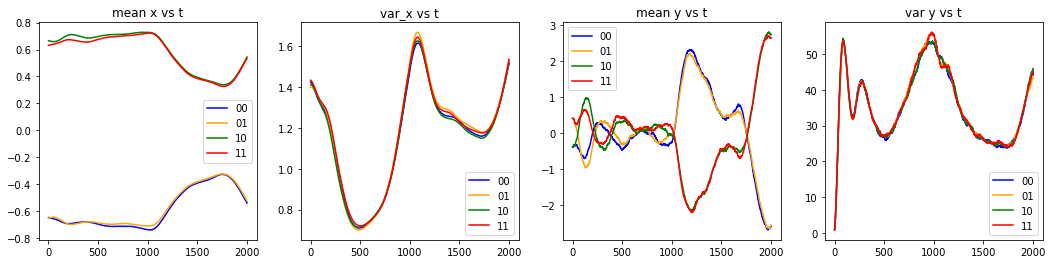

parameter/animation_ts_1_damping_4.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 4.0, 'gamma': 4, 'theta': 80, 'eta': 10}


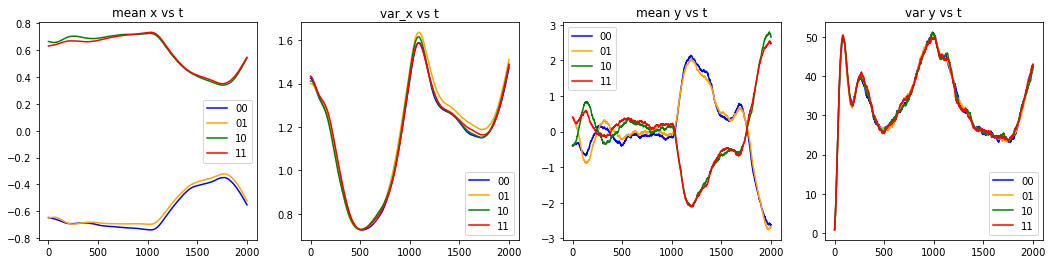

parameter/animation_ts_1_damping_5.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 5.0, 'gamma': 4, 'theta': 80, 'eta': 10}


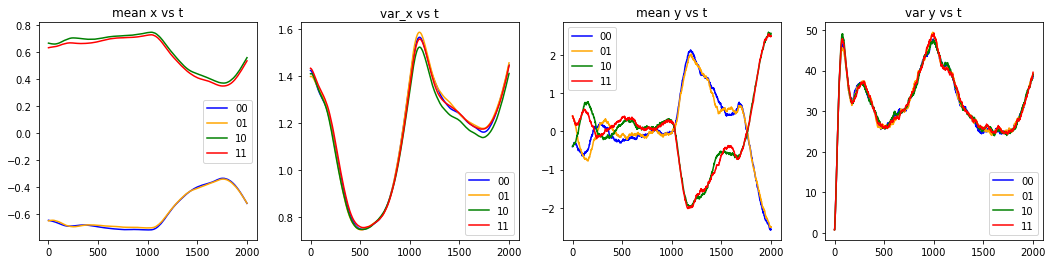

parameter/animation_ts_1_damping_6.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 6.0, 'gamma': 4, 'theta': 80, 'eta': 10}


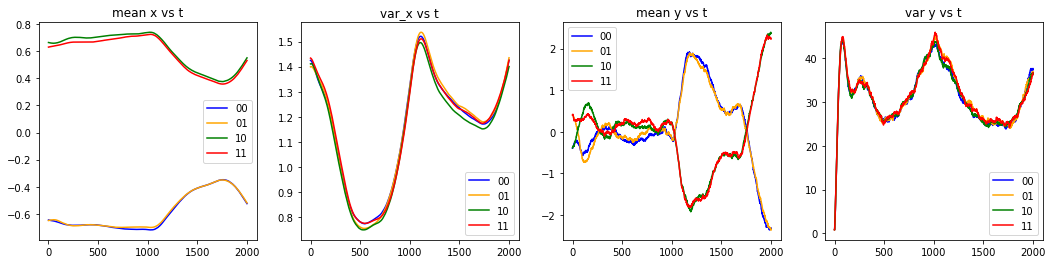

parameter/animation_ts_1_damping_7.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 7.0, 'gamma': 4, 'theta': 80, 'eta': 10}


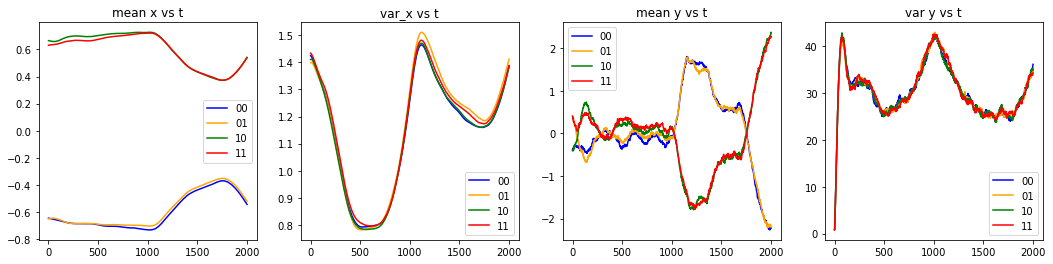

parameter/animation_ts_1_damping_8.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 8.0, 'gamma': 4, 'theta': 80, 'eta': 10}


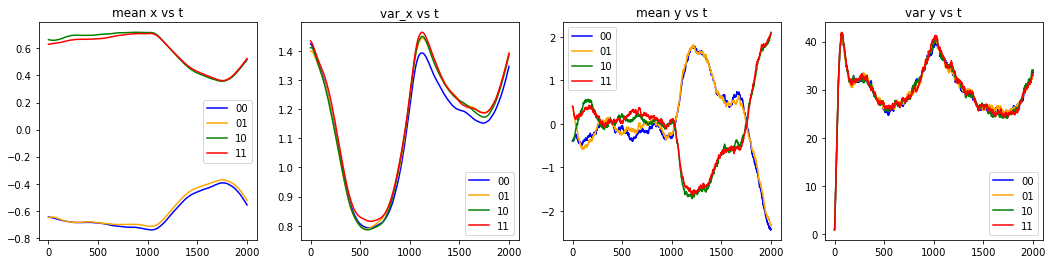

parameter/animation_ts_1_damping_9.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 9.0, 'gamma': 4, 'theta': 80, 'eta': 10}


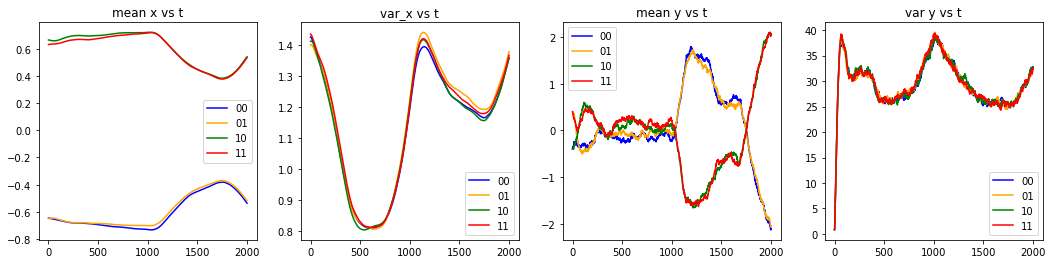

parameter/animation_ts_1_damping_10.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 10.0, 'gamma': 4, 'theta': 80, 'eta': 10}


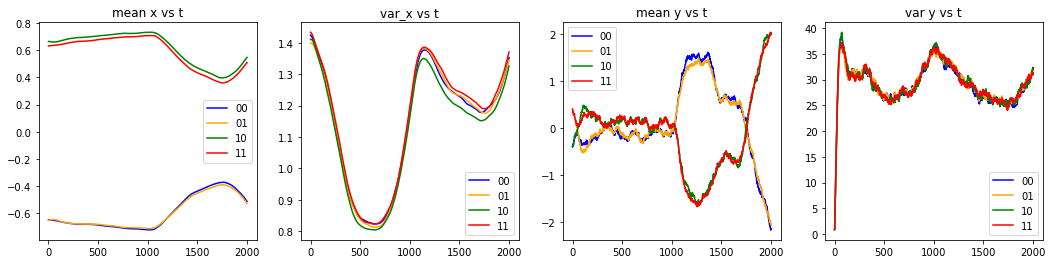

parameter/animation_ts_1_damping_1.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 1.0, 'gamma': 4, 'theta': 80, 'eta': 10}


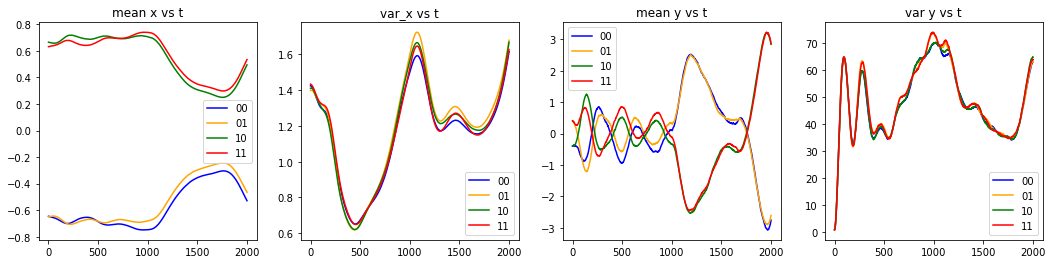

parameter/animation_ts_1_damping_2.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 2.0, 'gamma': 4, 'theta': 80, 'eta': 10}


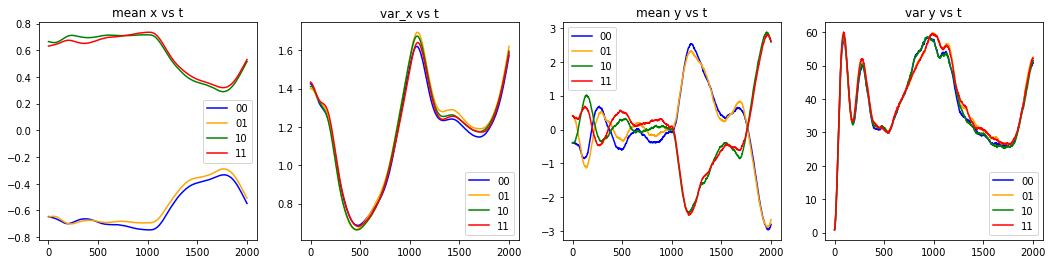

parameter/animation_ts_1_damping_3.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 3.0, 'gamma': 4, 'theta': 80, 'eta': 10}


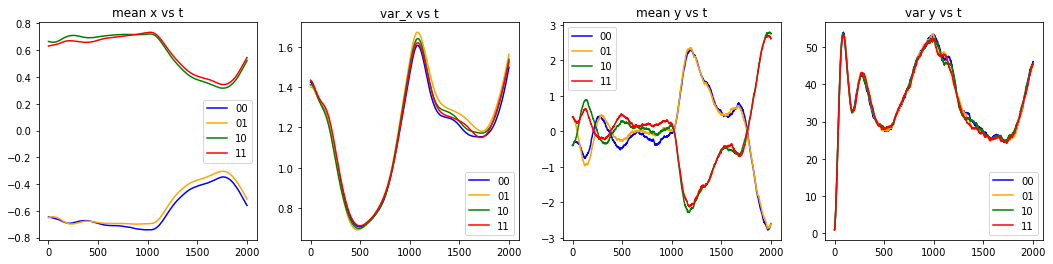

parameter/animation_ts_1_damping_4.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 4.0, 'gamma': 4, 'theta': 80, 'eta': 10}


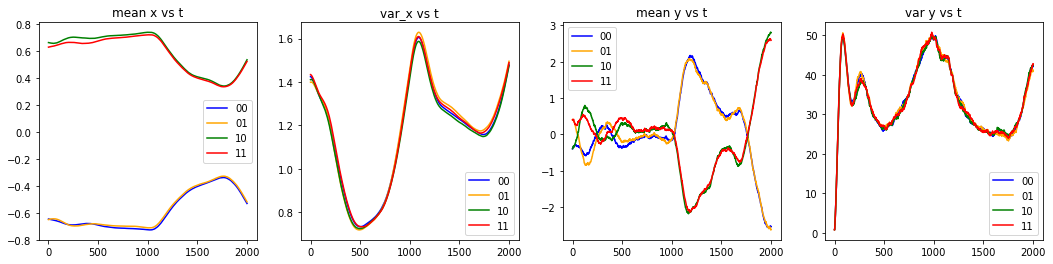

parameter/animation_ts_1_damping_5.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 5.0, 'gamma': 4, 'theta': 80, 'eta': 10}


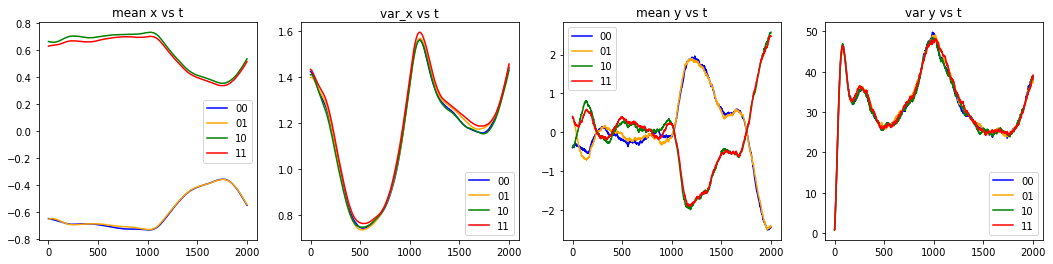

parameter/animation_ts_1_damping_6.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 6.0, 'gamma': 4, 'theta': 80, 'eta': 10}


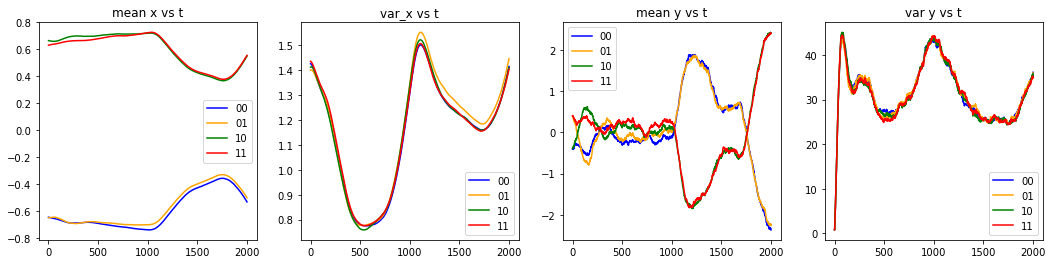

parameter/animation_ts_1_damping_7.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 7.0, 'gamma': 4, 'theta': 80, 'eta': 10}


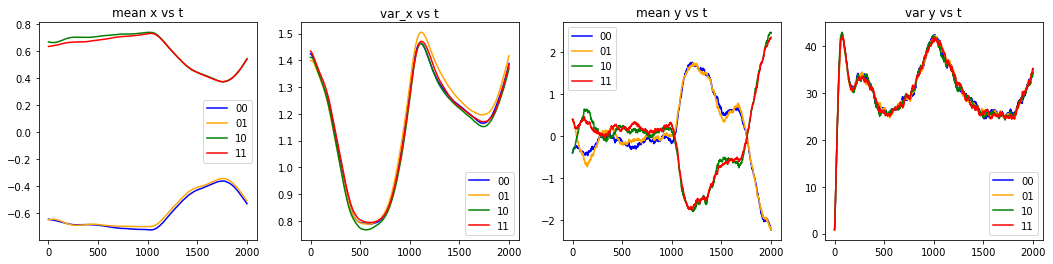

parameter/animation_ts_1_damping_8.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 8.0, 'gamma': 4, 'theta': 80, 'eta': 10}


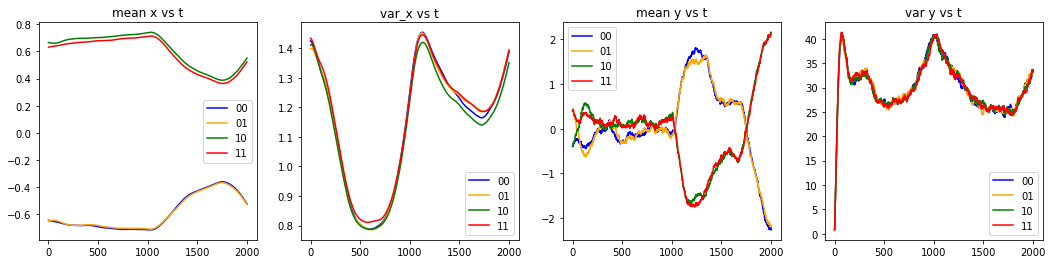

parameter/animation_ts_1_damping_9.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 9.0, 'gamma': 4, 'theta': 80, 'eta': 10}


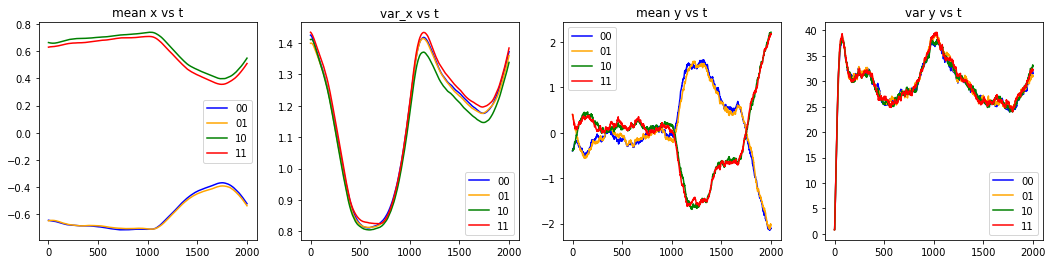

parameter/animation_ts_1_damping_10.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 10.0, 'gamma': 4, 'theta': 80, 'eta': 10}


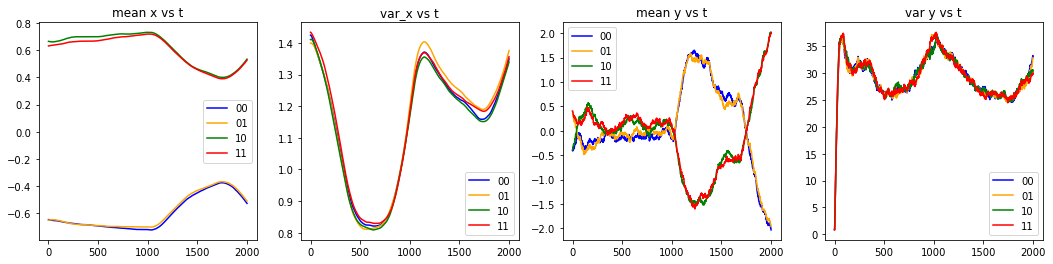

parameter/animation_ts_1_damping_1.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 1.0, 'gamma': 4, 'theta': 80, 'eta': 10}


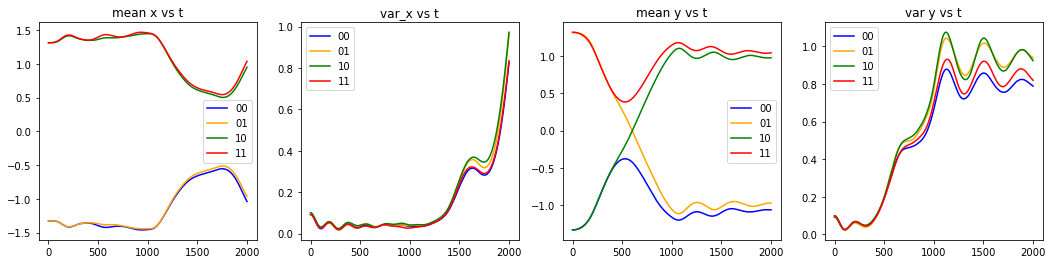

parameter/animation_ts_1_damping_2.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 2.0, 'gamma': 4, 'theta': 80, 'eta': 10}


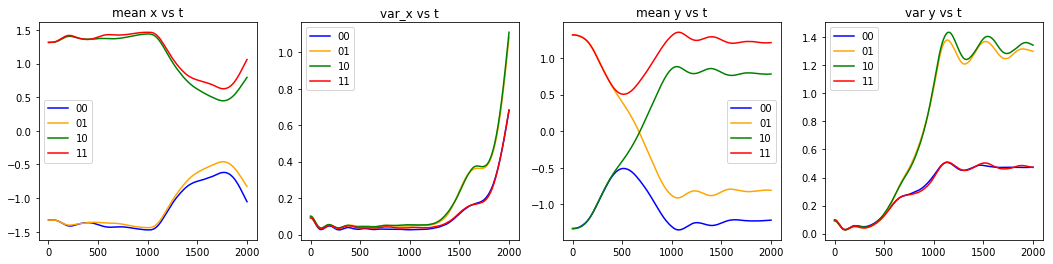

parameter/animation_ts_1_damping_3.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 3.0, 'gamma': 4, 'theta': 80, 'eta': 10}


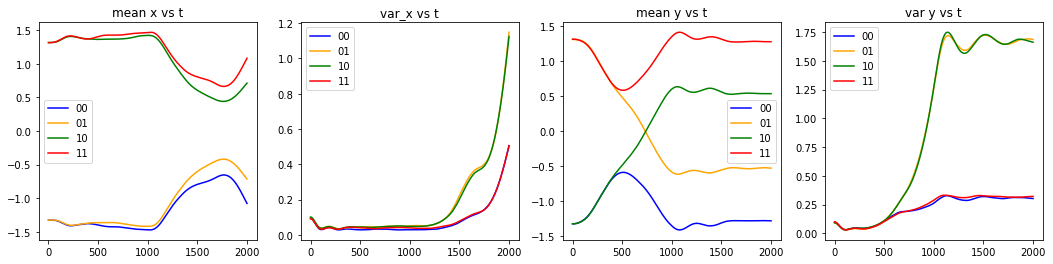

parameter/animation_ts_1_damping_4.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 4.0, 'gamma': 4, 'theta': 80, 'eta': 10}


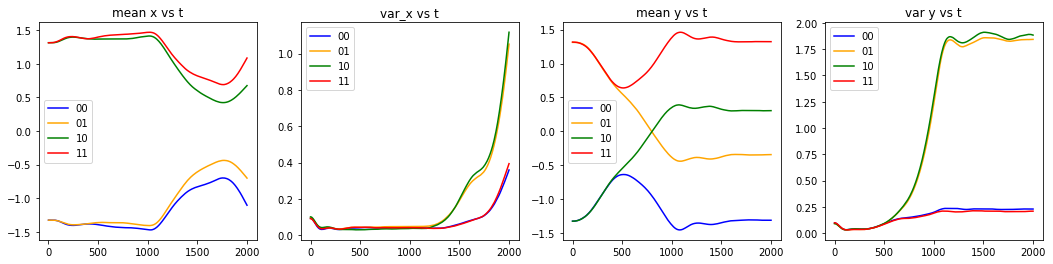

parameter/animation_ts_1_damping_5.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 5.0, 'gamma': 4, 'theta': 80, 'eta': 10}


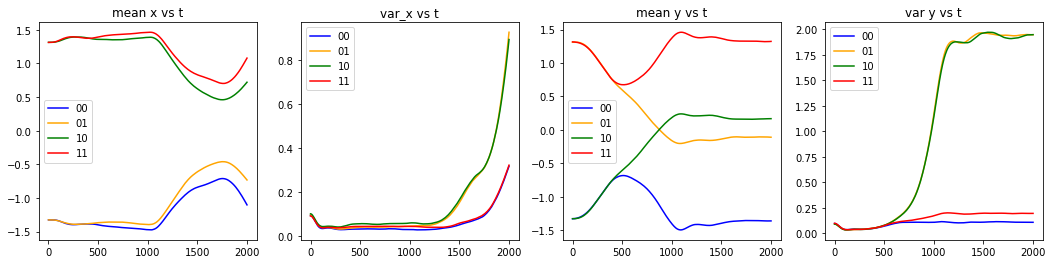

parameter/animation_ts_1_damping_6.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 6.0, 'gamma': 4, 'theta': 80, 'eta': 10}


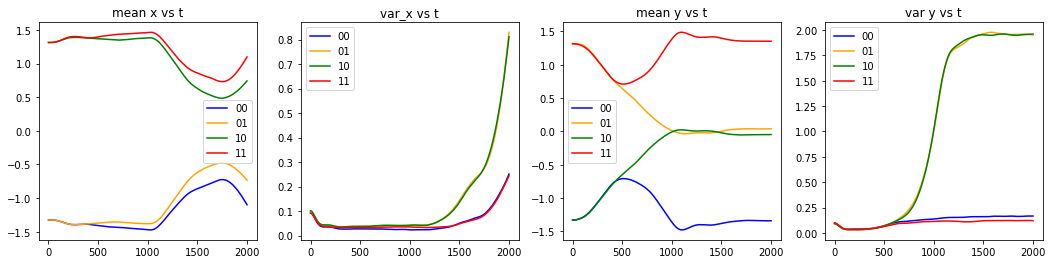

parameter/animation_ts_1_damping_7.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 7.0, 'gamma': 4, 'theta': 80, 'eta': 10}


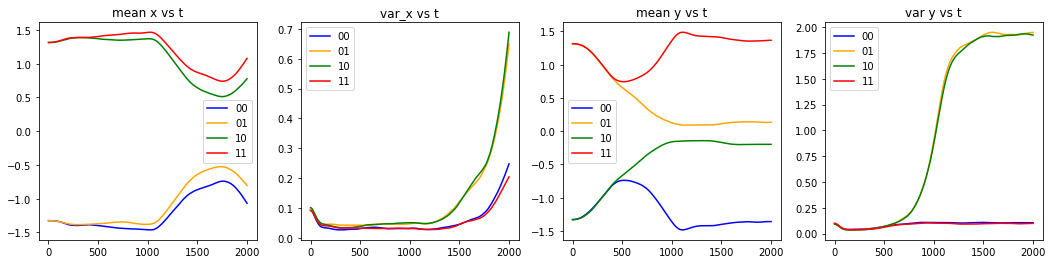

parameter/animation_ts_1_damping_8.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 8.0, 'gamma': 4, 'theta': 80, 'eta': 10}


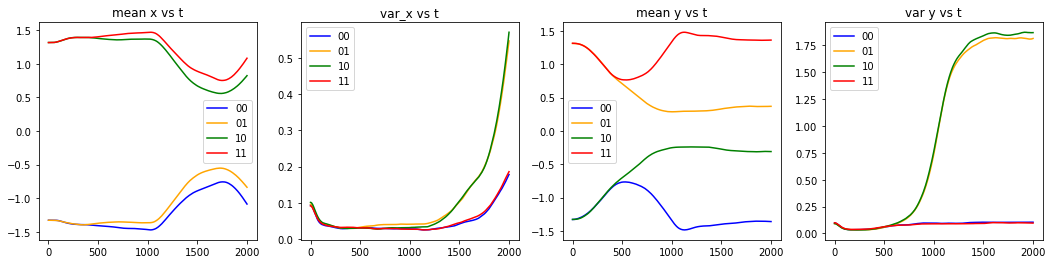

parameter/animation_ts_1_damping_9.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 9.0, 'gamma': 4, 'theta': 80, 'eta': 10}


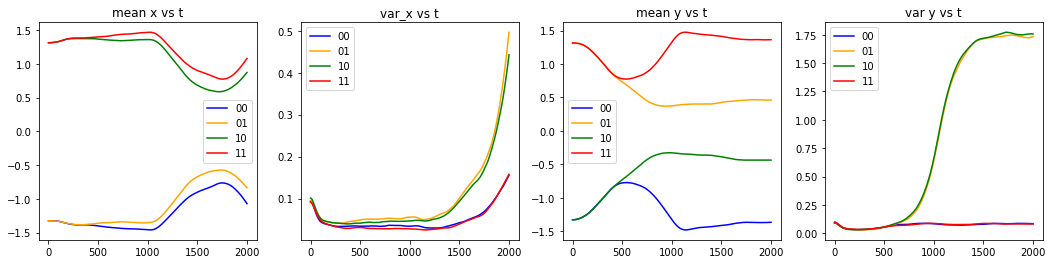

parameter/animation_ts_1_damping_10.0_parameter_4,80,10_times.gif
{'ts': 1, 'damping': 10.0, 'gamma': 4, 'theta': 80, 'eta': 10}


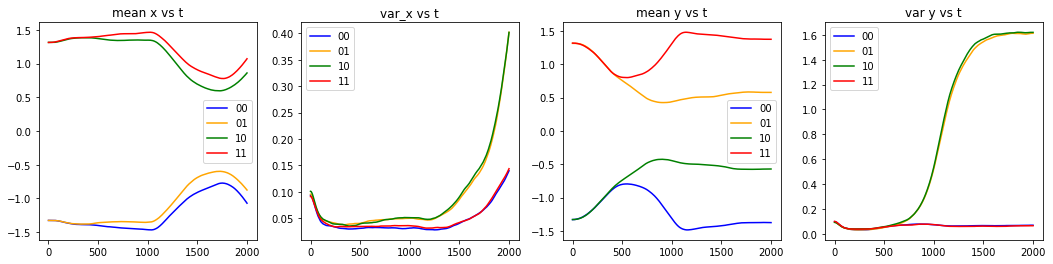

In [7]:
_label = "damping_sweep"
parameterName = "damping"
# analysisFunction(_label, "damping")


showSweepTimeDependentStatistics(_label, parameterName)

# theta sweep result

['ts: 4', 'damping: 1', 'gamma: 1', 'eta: 10']


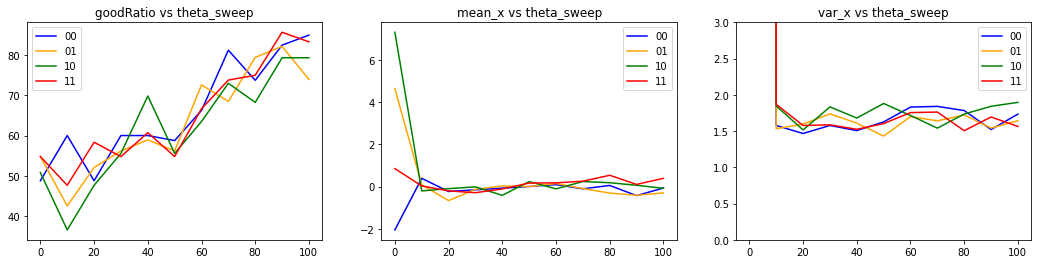

In [16]:
_label = "theta_sweep"
parameterName = "theta"
analysisFunction(_label, parameterName)

parameter/animation_ts_4_damping_1_parameter_1,0.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 0.0, 'eta': 10}


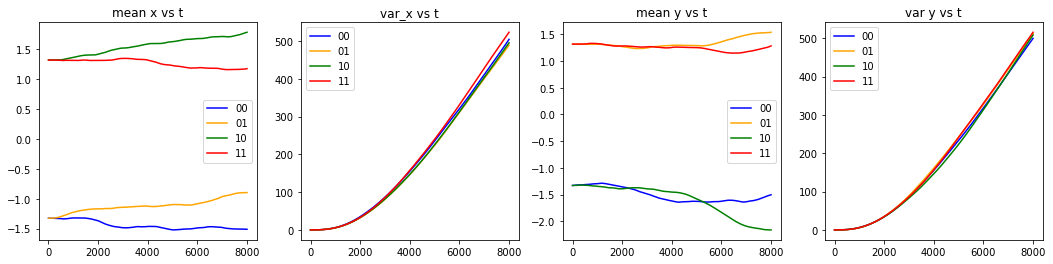

parameter/animation_ts_4_damping_1_parameter_1,10.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 10.0, 'eta': 10}


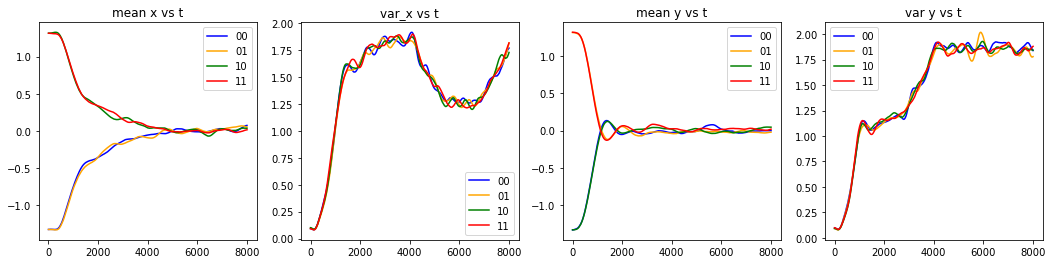

parameter/animation_ts_4_damping_1_parameter_1,20.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 20.0, 'eta': 10}


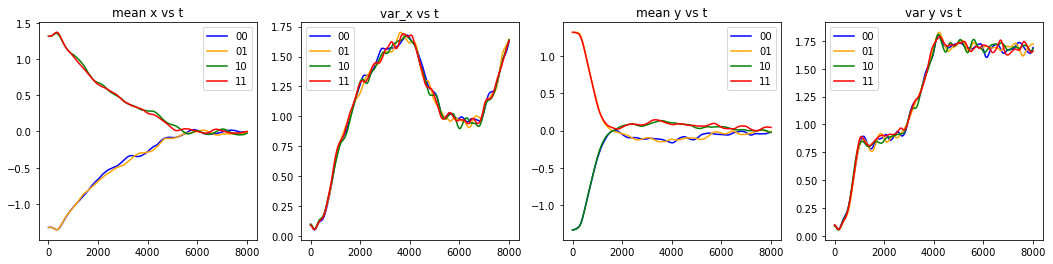

parameter/animation_ts_4_damping_1_parameter_1,30.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 30.0, 'eta': 10}


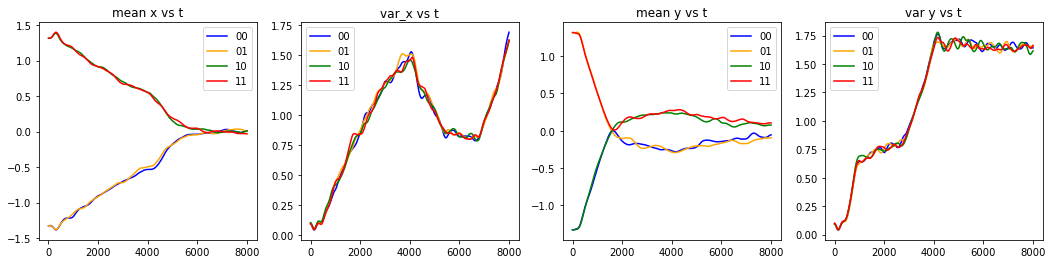

parameter/animation_ts_4_damping_1_parameter_1,40.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 40.0, 'eta': 10}


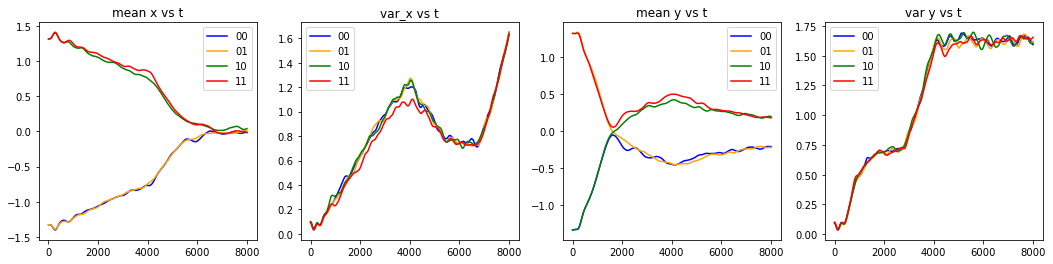

parameter/animation_ts_4_damping_1_parameter_1,50.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 50.0, 'eta': 10}


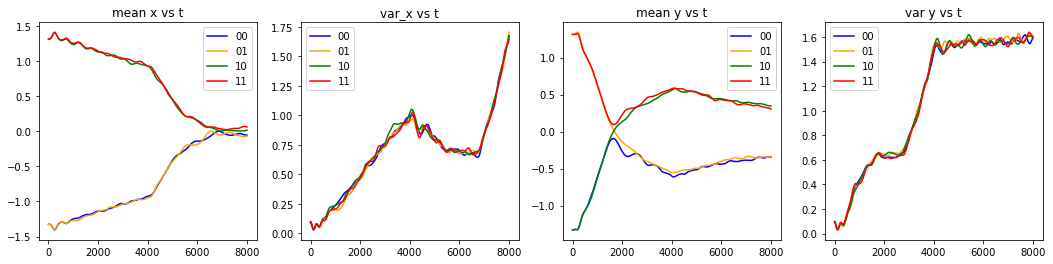

parameter/animation_ts_4_damping_1_parameter_1,60.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 60.0, 'eta': 10}


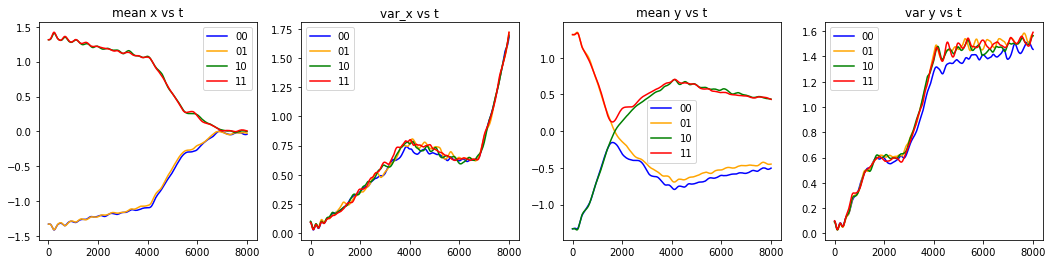

parameter/animation_ts_4_damping_1_parameter_1,70.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 70.0, 'eta': 10}


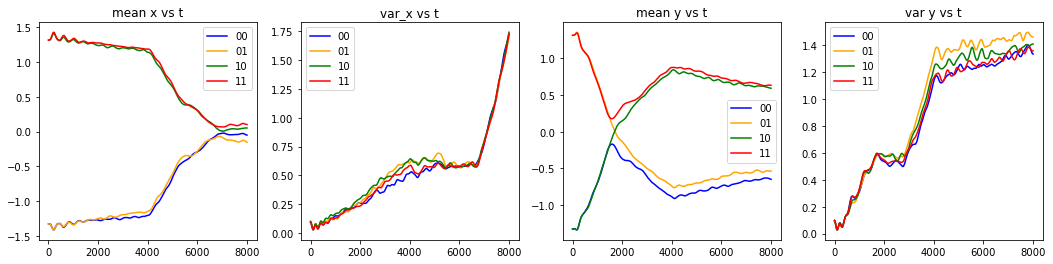

parameter/animation_ts_4_damping_1_parameter_1,80.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 80.0, 'eta': 10}


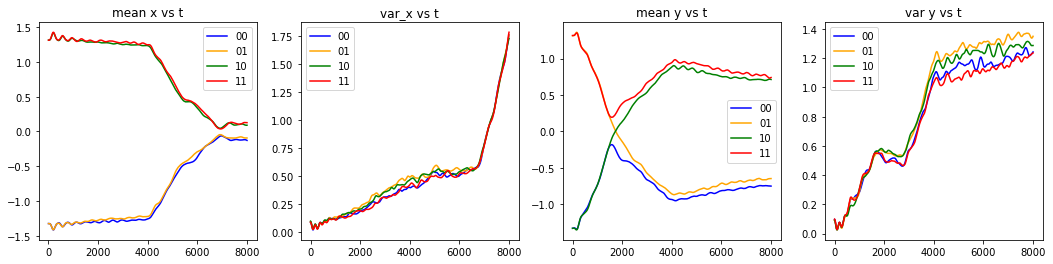

parameter/animation_ts_4_damping_1_parameter_1,90.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 90.0, 'eta': 10}


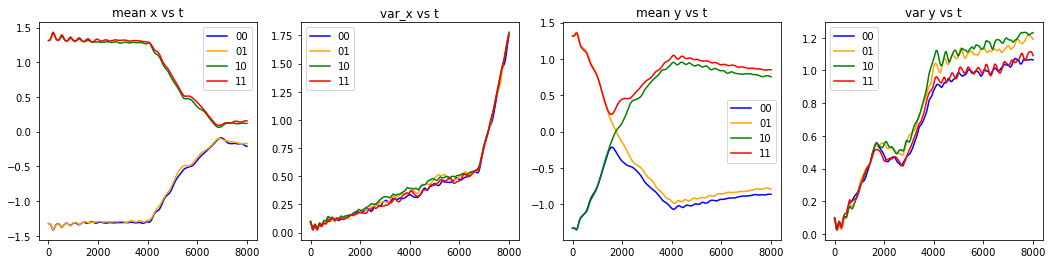

parameter/animation_ts_4_damping_1_parameter_1,100.0,10_times.gif
{'ts': 4, 'damping': 1, 'gamma': 1, 'theta': 100.0, 'eta': 10}


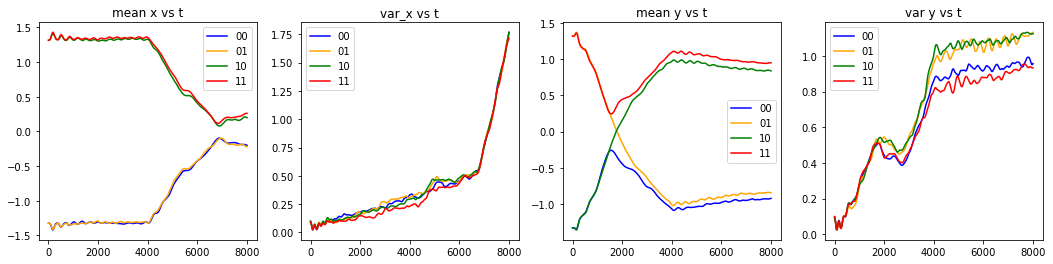

In [17]:
showSweepTimeDependentStatistics(_label, parameterName)

# gamma sweep result

['ts: 4', 'damping: 1', 'theta: 80', 'eta: 10']


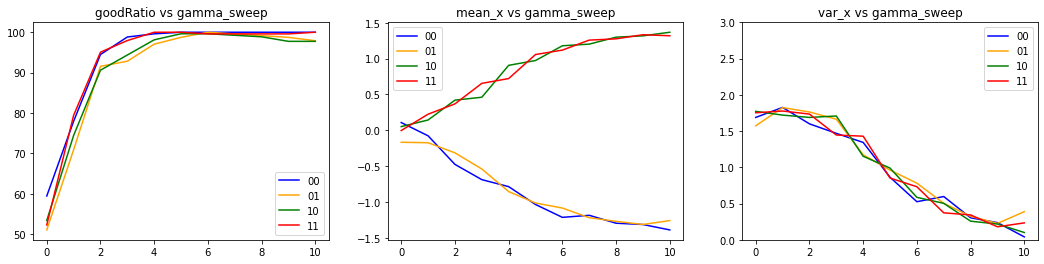

In [9]:
_label = "gamma_sweep"
parameterName = "gamma"
analysisFunction(_label, parameterName)

In [10]:
showBatchGIF(_label, parameterName)

parameter/animation_ts_4_damping_1_parameter_0.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 0.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 59.4488188976378, 'mean_x': 0.1071806211458362, 'var_x': 1.6885587932309292}
01 (orange): {'goodRatio': 51.0548523206751, 'mean_x': -0.16742785856472217, 'var_x': 1.5734366322838889}
10 (green): {'goodRatio': 53.383458646616546, 'mean_x': 0.050762035060392625, 'var_x': 1.772363211117944}
11 (red): {'goodRatio': 52.2633744855967, 'mean_x': -0.003649365867641484, 'var_x': 1.7526752796236376}


parameter/animation_ts_4_damping_1_parameter_1.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 1.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 77.95275590551181, 'mean_x': -0.07772254143593453, 'var_x': 1.826528718694284}
01 (orange): {'goodRatio': 70.88607594936708, 'mean_x': -0.1740217963775914, 'var_x': 1.8246247650179699}
10 (green): {'goodRatio': 74.43609022556392, 'mean_x': 0.14314274904331226, 'var_x': 1.7202911541680368}
11 (red): {'goodRatio': 79.42386831275721, 'mean_x': 0.22393582633266437, 'var_x': 1.7766255391168828}


parameter/animation_ts_4_damping_1_parameter_2.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 2.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 94.48818897637796, 'mean_x': -0.47631785907328544, 'var_x': 1.5998044679565169}
01 (orange): {'goodRatio': 91.56118143459916, 'mean_x': -0.31528398191460083, 'var_x': 1.7632468433928337}
10 (green): {'goodRatio': 90.6015037593985, 'mean_x': 0.41983236223271864, 'var_x': 1.688175360751126}
11 (red): {'goodRatio': 95.06172839506173, 'mean_x': 0.36792236641527265, 'var_x': 1.7346253111544088}


parameter/animation_ts_4_damping_1_parameter_3.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 3.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 98.81889763779527, 'mean_x': -0.6888094201778905, 'var_x': 1.468720745513306}
01 (orange): {'goodRatio': 92.82700421940928, 'mean_x': -0.5402020872350257, 'var_x': 1.6636408277649617}
10 (green): {'goodRatio': 94.3609022556391, 'mean_x': 0.46024504310598274, 'var_x': 1.70788509523897}
11 (red): {'goodRatio': 97.94238683127571, 'mean_x': 0.6538246924900522, 'var_x': 1.445706282543459}


parameter/animation_ts_4_damping_1_parameter_4.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 4.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 99.60629921259843, 'mean_x': -0.7863390297867843, 'var_x': 1.3434434869084209}
01 (orange): {'goodRatio': 97.0464135021097, 'mean_x': -0.8554469859604334, 'var_x': 1.1729211009104255}
10 (green): {'goodRatio': 98.1203007518797, 'mean_x': 0.9052750220153778, 'var_x': 1.1526875324333283}
11 (red): {'goodRatio': 100.0, 'mean_x': 0.7208150423405012, 'var_x': 1.4293561709432985}


parameter/animation_ts_4_damping_1_parameter_5.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 5.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.0352466773067956, 'var_x': 0.8632272157770438}
01 (orange): {'goodRatio': 98.73417721518987, 'mean_x': -1.0147129990543913, 'var_x': 0.9613810924376048}
10 (green): {'goodRatio': 99.62406015037594, 'mean_x': 0.972323484625981, 'var_x': 0.9896381422991518}
11 (red): {'goodRatio': 100.0, 'mean_x': 1.0559174536568336, 'var_x': 0.8521226614295367}


parameter/animation_ts_4_damping_1_parameter_6.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 6.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.214641415321366, 'var_x': 0.525488526118959}
01 (orange): {'goodRatio': 100.0, 'mean_x': -1.0848061505828681, 'var_x': 0.7816932362933549}
10 (green): {'goodRatio': 99.62406015037594, 'mean_x': 1.1781436656613773, 'var_x': 0.5858147610289485}
11 (red): {'goodRatio': 99.58847736625515, 'mean_x': 1.1177207229276296, 'var_x': 0.7319670459229167}


parameter/animation_ts_4_damping_1_parameter_7.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 7.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.1860704673147593, 'var_x': 0.597064359820829}
01 (orange): {'goodRatio': 99.57805907172997, 'mean_x': -1.2193978722265177, 'var_x': 0.5036064398742085}
10 (green): {'goodRatio': 99.24812030075188, 'mean_x': 1.201088601698574, 'var_x': 0.5030667729626477}
11 (red): {'goodRatio': 99.58847736625515, 'mean_x': 1.2567455547207051, 'var_x': 0.3721249306085622}


parameter/animation_ts_4_damping_1_parameter_8.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 8.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.296448947206159, 'var_x': 0.3040073004818551}
01 (orange): {'goodRatio': 99.15611814345992, 'mean_x': -1.2703099387539547, 'var_x': 0.3242163539660108}
10 (green): {'goodRatio': 98.87218045112782, 'mean_x': 1.297865175518949, 'var_x': 0.25715718366573004}
11 (red): {'goodRatio': 99.58847736625515, 'mean_x': 1.2748337868276154, 'var_x': 0.3432686412488158}


parameter/animation_ts_4_damping_1_parameter_9.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 9.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.314516929268822, 'var_x': 0.23700868955363516}
01 (orange): {'goodRatio': 98.73417721518987, 'mean_x': -1.3140324327323902, 'var_x': 0.22615902726870848}
10 (green): {'goodRatio': 97.74436090225564, 'mean_x': 1.3165996492075516, 'var_x': 0.21721295042041186}
11 (red): {'goodRatio': 99.58847736625515, 'mean_x': 1.331868549983732, 'var_x': 0.17936180395737336}


parameter/animation_ts_4_damping_1_parameter_10.0,80,10_times.gif
time stretch = 4, damping = 1, gamma = 10.0, theta = 80, eta = 10
00 (blue): {'goodRatio': 100.0, 'mean_x': -1.3898605974459426, 'var_x': 0.04034042174841283}
01 (orange): {'goodRatio': 97.8902953586498, 'mean_x': -1.259915980312111, 'var_x': 0.3883166265567233}
10 (green): {'goodRatio': 97.74436090225564, 'mean_x': 1.3666529852707363, 'var_x': 0.10065771685200353}
11 (red): {'goodRatio': 100.0, 'mean_x': 1.3177006443745725, 'var_x': 0.23336104901339205}


# Eta sweep result

['ts: 4', 'damping: 1', 'gamma: 4', 'theta: 80']


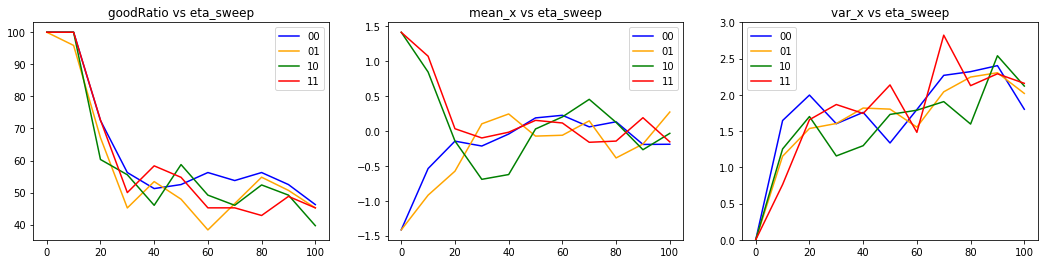

In [29]:
_label = "eta_sweep"
parameterName = "eta"
analysisFunction(_label, parameterName)





parameter/animation_ts_4_damping_1_parameter_4,80,0.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 0.0}


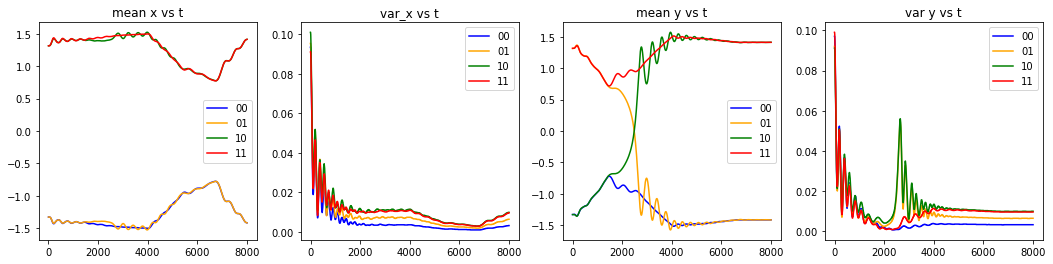

parameter/animation_ts_4_damping_1_parameter_4,80,10.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 10.0}


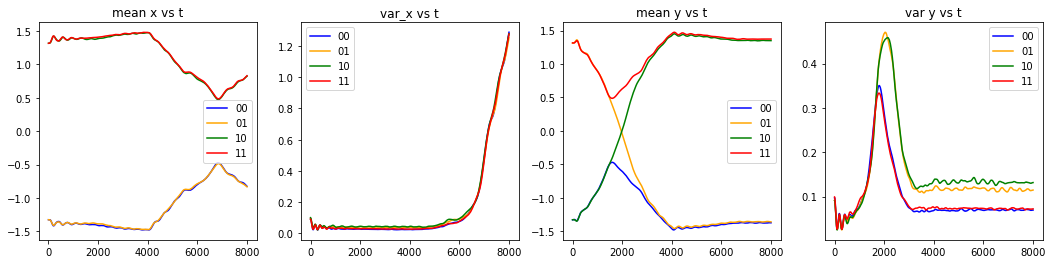

parameter/animation_ts_4_damping_1_parameter_4,80,20.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 20.0}


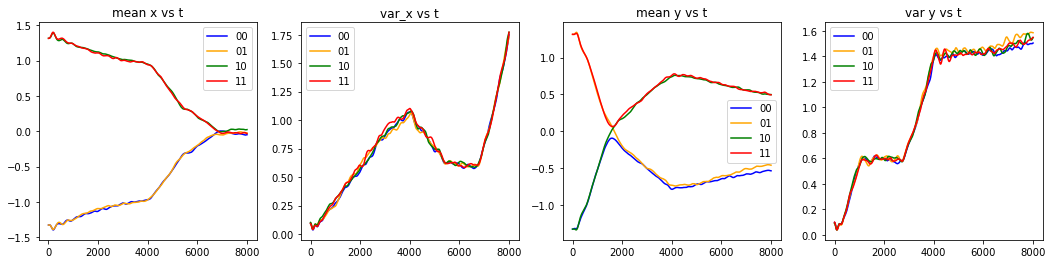

parameter/animation_ts_4_damping_1_parameter_4,80,30.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 30.0}


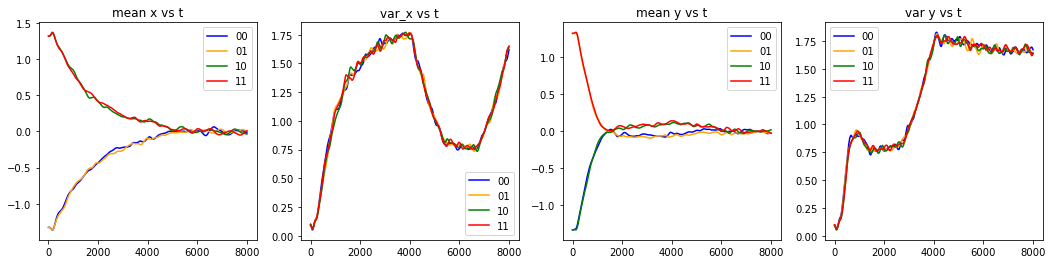

parameter/animation_ts_4_damping_1_parameter_4,80,40.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 40.0}


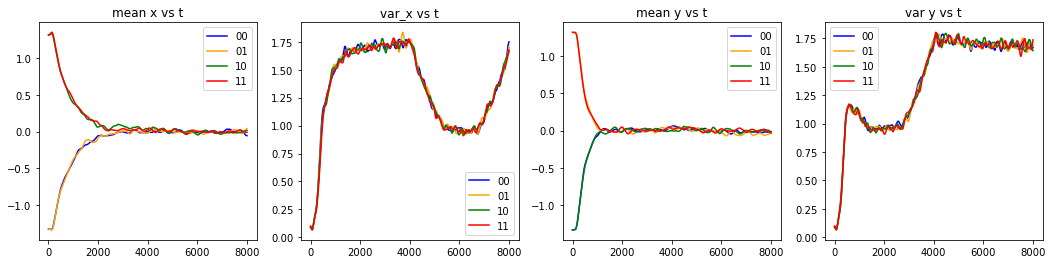

parameter/animation_ts_4_damping_1_parameter_4,80,50.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 50.0}


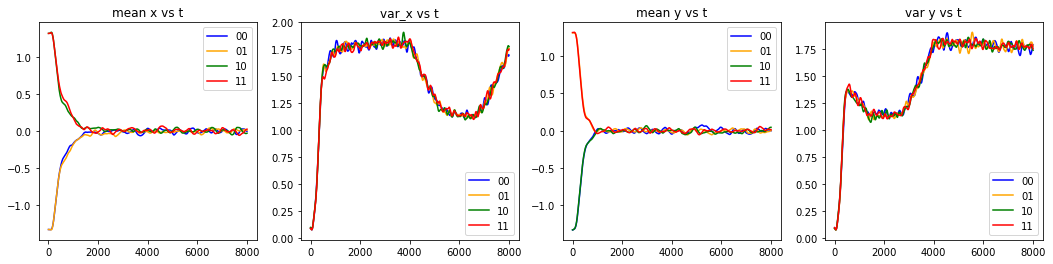

parameter/animation_ts_4_damping_1_parameter_4,80,60.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 60.0}


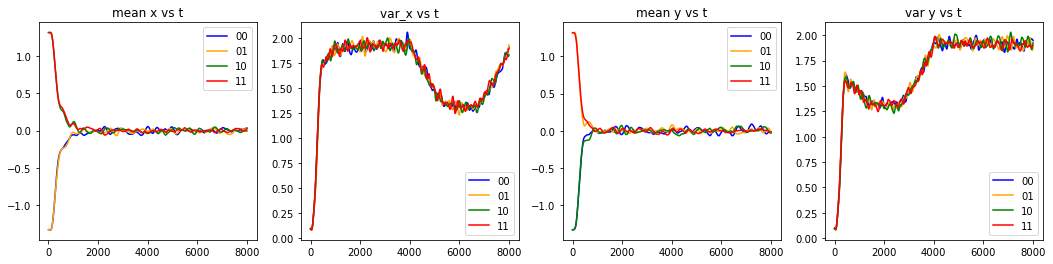

parameter/animation_ts_4_damping_1_parameter_4,80,70.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 70.0}


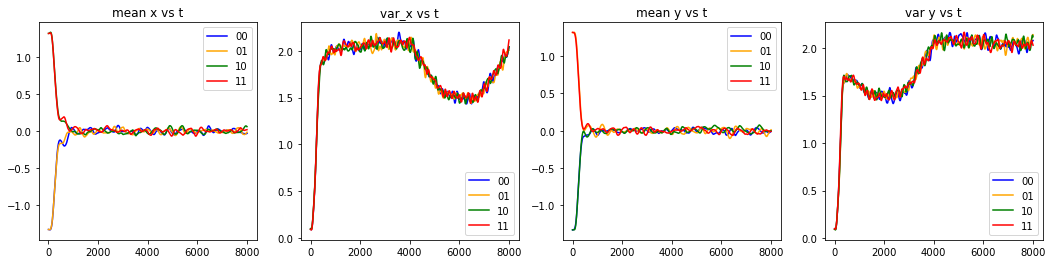

parameter/animation_ts_4_damping_1_parameter_4,80,80.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 80.0}


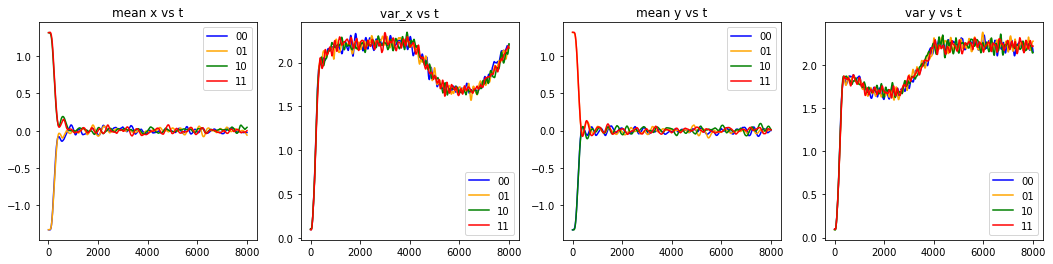

parameter/animation_ts_4_damping_1_parameter_4,80,90.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 90.0}


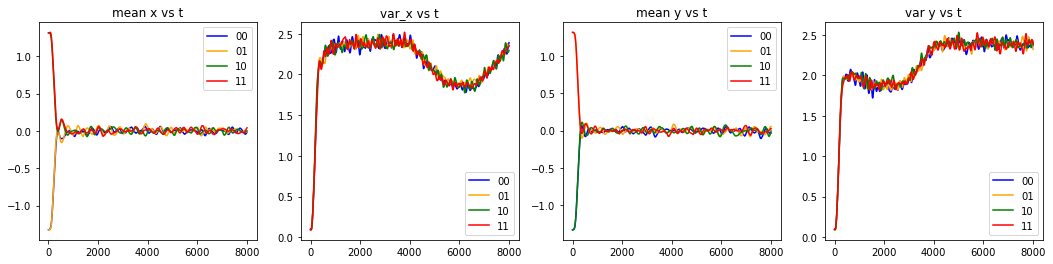

parameter/animation_ts_4_damping_1_parameter_4,80,100.0_times.gif
{'ts': 4, 'damping': 1, 'gamma': 4, 'theta': 80, 'eta': 100.0}


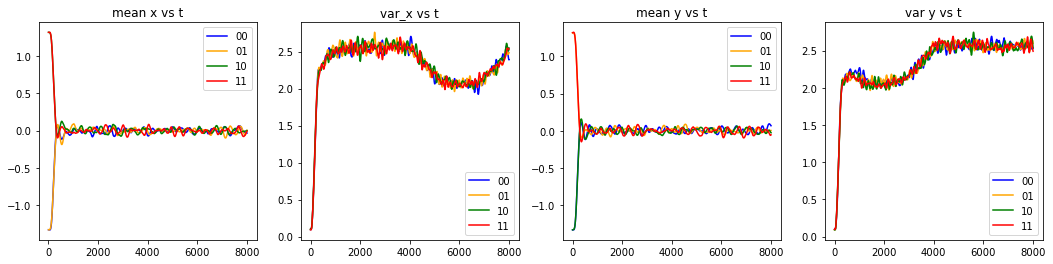

In [30]:
showSweepTimeDependentStatistics(_label, parameterName)